<a href="https://colab.research.google.com/github/VictoriaAkintomide/10Academy/blob/master/Interim_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
%matplotlib inline
pd.options.display.float_format = '{:20,.2f}'.format

In [1]:
from google.colab import files
uploaded = files.upload()


Saving cleaned_data.csv to cleaned_data.csv


In [4]:
data = pd.read_csv(io.BytesIO(uploaded['cleaned_data.csv']))
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_Data_Social_Media_Bytes,Total_Data_Google_Bytes,Total_Data_Email_Bytes,Total_Data_Youtube_Bytes,Total_Data_Netflix_Bytes,Total_Data_Gaming_Bytes,Total_Data_Other_Bytes,Total_UL_DL_Bytes
0,0,13114483460844900352,2019-04-04 12:01:18,770.00000,2019-04-25 14:35:31,662.00000,"1,823,652.00000","208,201,448,079,117.00000","33,664,962,239.00000","35,521,209,507,511.00000",9164566995485190,42.00000,5.00000,23.00000,44.00000,nan,nan,100.00000,0.00000,0.00000,0.00000,100.00000,0.00000,0.00000,0.00000,nan,nan,"37,624.00000","38,787.00000","1,823,652,892.00000",Samsung,Samsung Galaxy A5 Sm-A520F,nan,nan,nan,nan,nan,nan,213.00000,214.00000,"1,545,765.00000","24,420.00000","1,634,479.00000","1,271,433.00000","3,563,542.00000","137,762.00000","15,854,611.00000","2,501,332.00000","8,198,936.00000","9,656,251.00000","278,082,303.00000","14,344,150.00000","171,744,450.00000","8,814,393.00000","36,749,741.00000","308,879,636.00000","1,570,185.00000","2,905,912.00000","3,701,304.00000","18,355,943.00000","17,855,187.00000","292,426,453.00000","180,558,843.00000","345,629,377.00000"
1,1,13114483482878900224,2019-04-09 13:04:04,235.00000,2019-04-25 08:15:48,606.00000,"1,365,104.00000","208,201,909,211,140.00000","33,681,854,413.00000","35,794,009,006,359.00000",L77566A,65.00000,5.00000,16.00000,26.00000,nan,nan,100.00000,0.00000,0.00000,0.00000,100.00000,0.00000,0.00000,0.00000,nan,nan,168.00000,"3,560.00000","1,365,104,371.00000",Samsung,Samsung Galaxy J5 (Sm-J530),nan,nan,nan,nan,nan,nan,971.00000,"1,022.00000","1,926,113.00000","7,165.00000","3,493,924.00000","920,172.00000","629,046.00000","308,339.00000","20,247,395.00000","19,111,729.00000","18,338,413.00000","17,227,132.00000","608,750,074.00000","1,170,709.00000","526,904,238.00000","15,055,145.00000","53,800,391.00000","653,384,965.00000","1,933,278.00000","4,414,096.00000","937,385.00000","39,359,124.00000","35,565,545.00000","609,920,783.00000","541,959,383.00000","707,185,356.00000"
2,2,13114483484080500736,2019-04-09 17:42:11,1.00000,2019-04-25 11:58:13,652.00000,"1,361,762.00000","208,200,314,458,056.00000","33,760,627,129.00000","35,281,510,359,387.00000",D42335A,nan,nan,6.00000,9.00000,nan,nan,100.00000,0.00000,0.00000,0.00000,100.00000,0.00000,0.00000,0.00000,nan,nan,0.00000,0.00000,"1,361,762,651.00000",Samsung,Samsung Galaxy A8 (2018),nan,nan,nan,nan,nan,nan,751.00000,695.00000,"1,684,053.00000","42,224.00000","8,535,055.00000","1,694,064.00000","2,690,151.00000","672,973.00000","19,725,661.00000","14,699,576.00000","17,587,794.00000","6,163,408.00000","229,584,621.00000","395,630.00000","410,692,588.00000","4,215,763.00000","27,883,638.00000","279,807,335.00000","1,726,277.00000","10,229,119.00000","3,363,124.00000","34,425,237.00000","23,751,202.00000","229,980,251.00000","414,908,351.00000","307,690,973.00000"
3,3,13114483485442799616,2019-04-10 0

In [7]:
data.iloc[:,np.r_[1,8,29,40:64]]

,Bearer Id,MSISDN/Number,Dur. (ms).1,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_Data_Social_Media_Bytes,Total_Data_Google_Bytes,Total_Data_Email_Bytes,Total_Data_Youtube_Bytes,Total_Data_Netflix_Bytes,Total_Data_Gaming_Bytes,Total_Data_Other_Bytes,Total_UL_DL_Bytes
0,13114483460844900352,"33,664,962,239.00000","1,823,652,892.00000","1,545,765.00000","24,420.00000","1,634,479.00000","1,271,433.00000","3,563,542.00000","137,762.00000","15,854,611.00000","2,501,332.00000","8,198,936.00000","9,656,251.00000","278,082,303.00000","14,344,150.00000","171,744,450.00000","8,814,393.00000","36,749,741.00000","308,879,636.00000","1,570,185.00000","2,905,912.00000","3,701,304.00000","18,355,943.00000","17,855,187.00000","292,426,453.00000","180,558,843.00000","345,629,377.00000"
1,13114483482878900224,"33,681,854,413.00000","1,365,104,371.00000","1,926,113.00000","7,165.00000","3,493,924.00000","920,172.00000","629,046.00000","308,339.00000","20,247,395.00000","19,111,729.00000","18,338,413.00000","17,227,132.00000","608,750,074.00000","1,170,709.00000","526,904,238.00000","15,055,145.00000","53,800,391.00000","653,384,965.00000","1,933,278.00000","4,414,096.00000","937,385.00000","39,359,124.00000","35,565,545.00000","609,920,783.00000","541,959,383.00000","707,185,356.00000"
2,13114483484080500736,"33,760,627,129.00000","1,361,762,651.00000","1,684,053.00000","42,224.00000","8,535,055.00000","1,694,064.00000","2,690,151.00000","672,973.00000","19,725,661.00000","14,699,576.00000","17,587,794.00000","6,163,408.00000","229,584,621.00000","395,630.00000","410,692,588.00000","4,215,763.00000","27,883,638.00000","279,807,335.00000","1,726,277.00000","10,229,119.00000","3,363,124.00000","34,425,237.00000","23,751,202.00000","229,980,251.00000","414,908,351.00000","307,690,973.00000"
3,13114483485442799616,"33,750,343,200.00000","1,321,509,685.00000","644,121.00000","13,372.00000","9,023,734.00000","2,788,027.00000","1,439,754.00000","631,229.00000","21,388,122.00000","15,146,643.00000","13,994,646.00000","1,097,942.00000","799,538,153.00000","10,849,722.00000","749,039,933.00000","12,797,283.00000","43,324,218.00000","846,028,530.00000","657,493.00000","11,811,761.00000","2,070,983.00000","36,534,765.00000","15,092,588.00000","810,387,875.00000","761,837,216.00000","889,352,748.00000"
4,13114483499480700928,"33,699,795,932.00000","1,089,009,389.00000","862,600.00000","50,188.00000","6,248,284.00000","1,500,559.00000","1,936,496.00000","173,853.00000","15,259,380.00000","18,962,873.00000","17,124,581.00000","415,218.00000","527,707,248.00000","3,529,801.00000","550,709,500.00000","13,910,322.00000","38,542,814.00000","569,138,589.00000","912,788.00000","7,748,843.00000","2,110,349.00000","34,222,253.00000","17,539,799.00000","531,237,049.00000","564,619,822.00000","607,681,403.00000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148930,13042425979329300480,"33,668,648,496.00000","59,587,792.00000","962,097.00000","31,078.00000","1,139,573.00000","126,061.00000","3,459,965.00000","820,142.00000","6,550,499.00000","18,003,146.00000","22,468,983.00000","7,149,728.00000","784,435,351.00000","12,724,751.00000","321,383,162.00000","14,890,486.00000","53,745,392.00000","819,016,468.00000","993,175.00000","1,265,634.00000","4,280,107.00000","24,553,645.00000","29,618,711.00000","797,160,102.00000","336,273,648.00000","872,761,860.00000"
148931,7277825670196679680,"33,650,688,697.00000","81,230,763.00000","3,464,974.00000","52,091.00000","9,967,603.00000","2,817,311.00000","57,639.00000","633,237.00000","16,191,667.00000","11,763,428.00000","17,883,703.00000","19,678,161.00000","526,609,673.00000","9,197,207.00000","3,264,510.00000

In [14]:
#Aggregate per user the number of xDR sessions
#Bearer Id - xDr session identifier
#MSISDN/Number MS International PSTN/ISDN Number of mobile - customer number
xdr_session_per_user = data.groupby('MSISDN/Number').agg({'Bearer Id': 'count'})
xdr_session_per_user.describe()

,Bearer Id
count,"106,856.00"
mean,1.39
std,0.81
min,1.00
25%,1.00
50%,1.00
75%,2.00
max,18.00


In [9]:
xdr_session_per_user

,Bearer Id
MSISDN/Number,
"33,601,001,722.00000",1
"33,601,001,754.00000",1
"33,601,002,511.00000",1
"33,601,007,832.00000",1
"33,601,008,617.00000",2
...,...
"33,789,996,170.00000",1
"33,789,997,247.00000",1
"3,197,020,876,596.00000",1


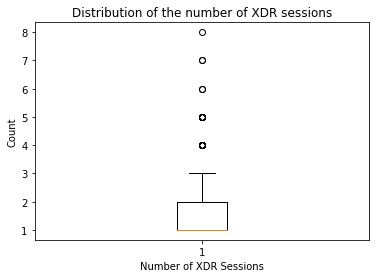

In [34]:
sample_a = xdr_session_per_user.sample(n=1000)
plt.xlabel('Number of XDR Sessions')
plt.ylabel('Count')
plt.title('Distribution of the number of XDR sessions')
plt.boxplot(sample_a['Bearer Id'])
plt.savefig('xdr_sessions.png', dpi=300)
plt.show()


In [15]:
#Aggregate per user the session duration
#Dur. (ms) Total Duration of the xDR (in ms)
#MSISDN/Number MS International PSTN/ISDN Number of mobile - customer number
session_duration_per_user = data.groupby('MSISDN/Number').agg({'Dur. (ms).1': 'sum'})
session_duration_per_user.describe()

,Dur. (ms).1
count,"106,856.00"
mean,"146,167,916.58"
std,"186,358,950.77"
min,"7,142,988.00"
25%,"71,308,343.00"
50%,"102,740,222.00"
75%,"172,800,001.00"
max,"18,553,763,486.00"


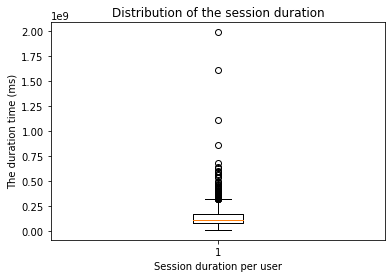

In [35]:
sample_b = session_duration_per_user.sample(n=1000)
plt.xlabel('Session duration per user')
plt.ylabel('The duration time (ms)')
plt.title('Distribution of the session duration')
plt.boxplot(sample_b['Dur. (ms).1'])
plt.savefig('session_duration.png', dpi=300)
plt.show()


In [16]:
#Aggregate per user the  total download (DL) data
#Total DL (Bytes) Data volume (in Bytes) received by the MS during this session (IP layer + overhead)
#MSISDN/Number MS International PSTN/ISDN Number of mobile - customer number
total_download_per_user = data.groupby('MSISDN/Number').agg({'Total DL (Bytes)': 'sum'})
total_download_per_user.describe()

,Total DL (Bytes)
count,"106,856.00"
mean,"633,652,680.89"
std,"464,555,056.46"
min,"8,827,082.00"
25%,"314,827,063.75"
50%,"570,367,723.00"
75%,"807,364,490.25"
max,"8,156,743,493.00"


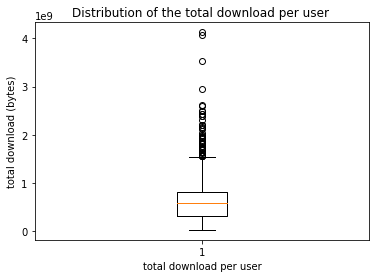

In [36]:
sample_c = total_download_per_user.sample(n=1000)
plt.xlabel('total download per user')
plt.ylabel('total download (bytes)')
plt.title('Distribution of the total download per user ')
plt.boxplot(sample_c['Total DL (Bytes)'])
plt.savefig('download.png', dpi=300)
plt.show()


In [17]:
#Aggregate per user the total upload (UL) data
#Total UL (Bytes) Data volume (in Bytes) sent by the MS during this session (IP layer + overhead)
#MSISDN/Number MS International PSTN/ISDN Number of mobile - customer number
total_upload_per_user = data.groupby('MSISDN/Number').agg({'Total UL (Bytes)': 'sum'})
total_upload_per_user.describe()

,Total UL (Bytes)
count,"106,856.00"
mean,"57,309,422.41"
std,"35,657,649.75"
min,"2,866,892.00"
25%,"36,395,474.75"
50%,"46,793,865.50"
75%,"65,731,993.00"
max,"729,577,380.00"


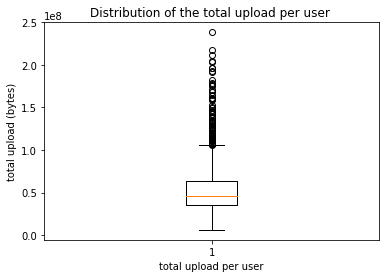

In [37]:
sample_d = total_upload_per_user.sample(n=1000)
plt.xlabel('total upload per user')
plt.ylabel('total upload (bytes)')
plt.title('Distribution of the total upload per user ')
plt.boxplot(sample_d['Total UL (Bytes)'])
plt.savefig('upload.png', dpi=300)
plt.show()


In [18]:
#the total data volume (in Bytes) during this session for Social Media
total_data_volume_social_media_per_user = data.groupby('MSISDN/Number').agg({'Total_Data_Social_Media_Bytes': 'sum'})
total_data_volume_social_media_per_user.describe()

,Total_Data_Social_Media_Bytes
count,"106,856.00"
mean,"2,547,966.82"
std,"1,908,038.04"
min,"1,563.00"
25%,"1,211,281.50"
50%,"2,303,756.00"
75%,"3,307,509.00"
max,"43,374,779.00"


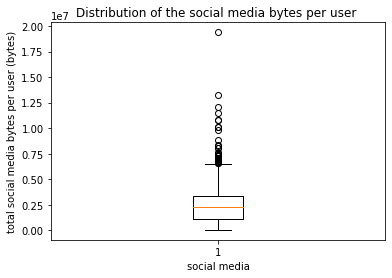

In [39]:
sample_e = total_data_volume_social_media_per_user.sample(n=1000)
plt.xlabel('social media')
plt.ylabel('total social media bytes per user (bytes)')
plt.title('Distribution of the social media bytes per user ')
plt.boxplot(sample_e['Total_Data_Social_Media_Bytes'])
plt.savefig('social.png', dpi=300)
plt.show()


In [19]:
#the total data volume (in Bytes) during this session for Google
total_data_volume_google_per_user = data.groupby('MSISDN/Number').agg({'Total_Data_Google_Bytes': 'sum'})
total_data_volume_google_per_user.describe()

,Total_Data_Google_Bytes
count,"106,856.00"
mean,"10,882,434.42"
std,"7,544,861.44"
min,"40,330.00"
25%,"5,942,636.00"
50%,"9,586,153.00"
75%,"13,214,739.75"
max,"152,191,852.00"


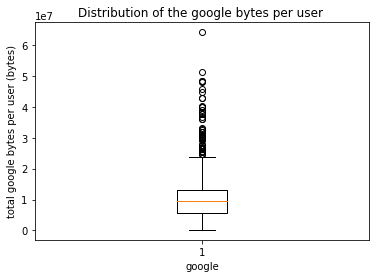

In [41]:
sample_f = total_data_volume_google_per_user.sample(n=1000)
plt.xlabel('google')
plt.ylabel('total google bytes per user (bytes)')
plt.title('Distribution of the google bytes per user ')
plt.boxplot(sample_f['Total_Data_Google_Bytes'])
plt.savefig('google.png', dpi=300)
plt.show()


In [20]:
#the total data volume (in Bytes) during this session for Email
total_data_volume_email_per_user = data.groupby('MSISDN/Number').agg({'Total_Data_Email_Bytes': 'sum'})
total_data_volume_email_per_user.describe()

,Total_Data_Email_Bytes
count,"106,856.00"
mean,"3,148,795.81"
std,"2,222,400.10"
min,"18,176.00"
25%,"1,674,481.00"
50%,"2,799,824.50"
75%,"3,847,197.50"
max,"42,418,782.00"


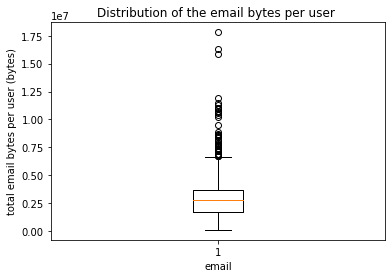

In [43]:
sample_g = total_data_volume_email_per_user.sample(n=1000)
plt.xlabel('email')
plt.ylabel('total email bytes per user (bytes)')
plt.title('Distribution of the email bytes per user ')
plt.boxplot(sample_g['Total_Data_Email_Bytes'])
plt.savefig('email.png', dpi=300)
plt.show()


In [21]:
#the total data volume (in Bytes) during this session for Youtube
total_data_volume_youtube_per_user = data.groupby('MSISDN/Number').agg({'Total_Data_Youtube_Bytes': 'sum'})
total_data_volume_youtube_per_user.describe()

,Total_Data_Youtube_Bytes
count,"106,856.00"
mean,"31,558,399.28"
std,"21,294,917.68"
min,"78,903.00"
25%,"18,631,088.50"
50%,"26,800,376.00"
75%,"37,927,975.75"
max,"452,958,769.00"


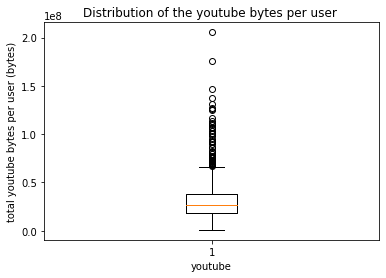

In [45]:
sample_h = total_data_volume_youtube_per_user.sample(n=1000)
plt.xlabel('youtube')
plt.ylabel('total youtube bytes per user (bytes)')
plt.title('Distribution of the youtube bytes per user ')
plt.boxplot(sample_h['Total_Data_Youtube_Bytes'])
plt.savefig('youtube.png', dpi=300)
plt.show()

In [22]:
#the total data volume (in Bytes) during this session for Netflix
total_data_volume_netflix_per_user = data.groupby('MSISDN/Number').agg({'Total_Data_Netflix_Bytes': 'sum'})
total_data_volume_netflix_per_user.describe()

,Total_Data_Netflix_Bytes
count,"106,856.00"
mean,"31,538,332.31"
std,"21,289,556.97"
min,"184,569.00"
25%,"18,555,972.75"
50%,"26,718,889.50"
75%,"37,976,957.00"
max,"399,519,079.00"


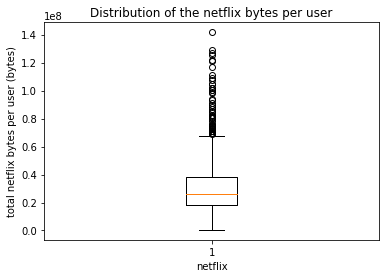

In [46]:
sample_i = total_data_volume_netflix_per_user.sample(n=1000)
plt.xlabel('netflix')
plt.ylabel('total netflix bytes per user (bytes)')
plt.title('Distribution of the netflix bytes per user')
plt.boxplot(sample_i['Total_Data_Netflix_Bytes'])
plt.savefig('netflix.png', dpi=300)
plt.show()

In [23]:
#the total data volume (in Bytes) during this session for Gaming
total_data_volume_gaming_per_user = data.groupby('MSISDN/Number').agg({'Total_Data_Gaming_Bytes': 'sum'})
total_data_volume_gaming_per_user.describe()

,Total_Data_Gaming_Bytes
count,"106,856.00"
mean,"599,769,010.72"
std,"449,150,462.40"
min,"306,358.00"
25%,"288,063,112.50"
50%,"542,349,206.50"
75%,"777,304,138.00"
max,"7,749,432,234.00"


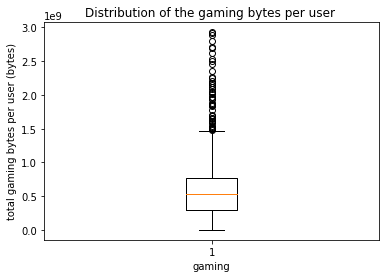

In [49]:
sample_j = total_data_volume_gaming_per_user.sample(n=1000)
plt.xlabel('gaming')
plt.ylabel('total gaming bytes per user (bytes)')
plt.title('Distribution of the gaming bytes per user ')
plt.boxplot(sample_j['Total_Data_Gaming_Bytes'])
plt.savefig('gaming.png', dpi=300)
plt.show()

In [24]:
#the total data volume (in Bytes) during this session for Other 
total_data_volume_other_per_user = data.groupby('MSISDN/Number').agg({'Total_Data_Other_Bytes': 'sum'})
total_data_volume_other_per_user.describe()

,Total_Data_Other_Bytes
count,"106,856.00"
mean,"598,508,764.28"
std,"448,922,110.04"
min,"149,045.00"
25%,"285,559,911.00"
50%,"539,832,343.00"
75%,"775,397,530.75"
max,"8,167,877,776.00"


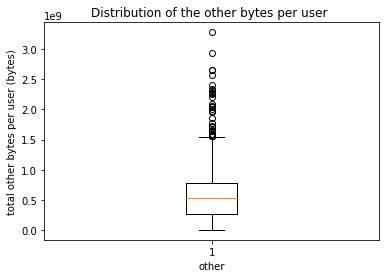

In [50]:
sample_k = total_data_volume_other_per_user.sample(n=1000)
plt.xlabel('other')
plt.ylabel('total other bytes per user (bytes)')
plt.title('Distribution of the other bytes per user ')
plt.boxplot(sample_k['Total_Data_Other_Bytes'])
plt.savefig('other.png', dpi=300)
plt.show()

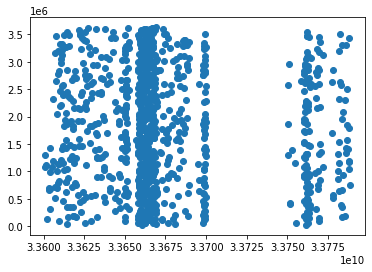

In [38]:
sample_o = data.sample(n=1000)
plt.scatter(x=sample_o['MSISDN/Number'], y=sample_o['Total_Data_Social_Media_Bytes'])
plt.show()